In [1]:
import numpy as np

from mapper_functions import plot_global
from mapper_functions import plot_na

from my_functions import read_ascat_bufr_v2

In [2]:
path = '../test_data/Metop_B/Y2015/M08/'  # '/discover/nobackup/amfox/ASCAT_EUMETSAT/Metop-B/Y2019/M06' 
file_name_start = 'M01-ASCA-ASCSMO02-NA-5.0-2015080' # First ten days
printflag = True

lat, lon, ssom, tpcx, domo, smpf, smcf, alfr, iwfr, snoc, flsf = read_ascat_bufr_v2(path, file_name_start, printflag)

Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801011800.000000000Z-20150801020434-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801030000.000000000Z-20150801034722-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801044200.000000000Z-20150801053005-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801062400.000000000Z-20150801071251-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801080600.000000000Z-20150801085510-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801094800.000000000Z-20150801103704-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801112700.000000000Z-20150801121731-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801130900.000000000Z-20150801135804-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801144800.000000000Z-20150801153759-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-20150801163000.000000000Z-20150801171826-1348366.bfr ...
Reading file  M01-ASCA-ASCSMO02-NA-5.0-2

In [3]:
is_nan = np.isnan(smcf)
flag, counts = np.unique(smcf[~is_nan], return_counts=True)
print(flag, counts, flag.dtype)
flag_int64 = flag.astype(np.int64)


[0 1 2 4 5 6] [7562090   30297   39441  986053   59172   11907] int64


In [4]:
for i in range(len(flag_int64)):
    result = np.binary_repr(flag_int64[i], width=8)
    print(result, counts[i])

00000000 7562090
00000001 30297
00000010 39441
00000100 986053
00000101 59172
00000110 11907


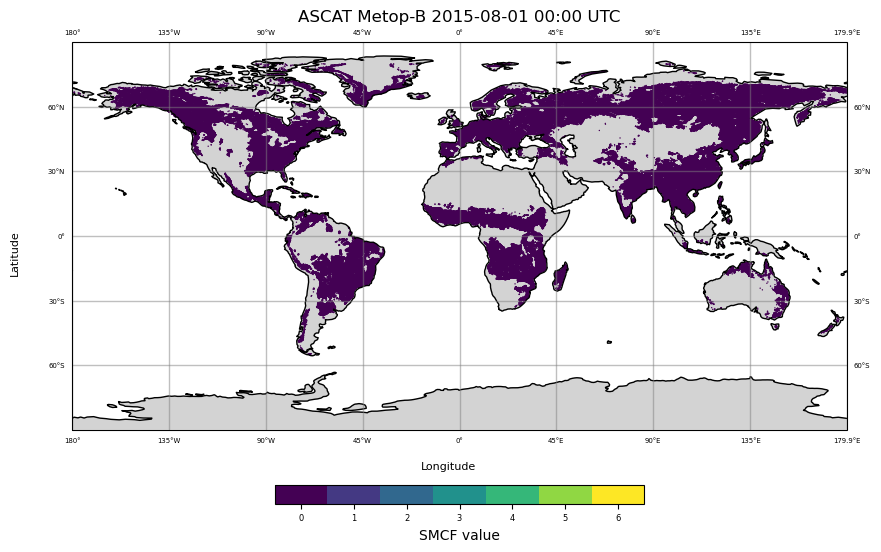

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import warnings


# Plot the data

# obarray = np.empty([np.sum(smcf >= 4), 3])
# obarray[:, 1] = lon[smcf >= 4]
# obarray[:, 2] = lat[smcf >= 4]
# obarray[:, 0] = smcf[smcf >= 4]

# obarray = np.empty([len(smcf), 3])
# obarray[:, 1] = lon
# obarray[:, 2] = lat
# obarray[:, 0] = smcf

mask = (smpf == 0) & (smcf == 0)
obarray = np.empty([np.sum(mask), 3])
obarray[:, 1] = lon[mask]
obarray[:, 2] = lat[mask]
obarray[:, 0] = smcf[mask]


array = obarray

plot_title = 'ASCAT Metop-B 2015-08-01 00:00 UTC'
units = 'SMCF value'

# Info for colorbar
cmin = -0.5 # np.min(array[:, 0]) 
cmax = 6.5 # np.max(array[:, 0]) 
cmap = plt.get_cmap('viridis', 7)

# Create the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))
# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                        linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Set the land color to light gray
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS)

# scatter data
sc = ax.scatter(array[:, 1], array[:, 2],
                c=array[:, 0], s=1, linewidth=0, cmap=cmap, vmin=cmin, vmax=cmax,
                transform=ccrs.PlateCarree()) 
# Set the colorbar properties
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.12, fraction=0.04)
cbar.ax.tick_params(labelsize=6)
cbar.set_label(units, fontsize=10)

# Set the axis and title labels
plt.title(plot_title, fontsize=12)
ax.text(0.45, -0.1,   'Longitude', fontsize=8, transform=ax.transAxes, ha='left')
ax.text(-0.08, 0.4, 'Latitude', fontsize=8, transform=ax.transAxes, rotation='vertical', va='bottom')


savename = plot_title+'.png'
# print(" Saving figure as", savename, "\n")
# plt.savefig(savename, dpi = 400)    

# Show the plot
plt.show()